In [2]:
import numpy as np
import pandas as pd

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Calculating Probabilities and Plotting Distributions

## Permutation and combination

In [41]:
# import for permutation and combination
from itertools import permutations, combinations, combinations_with_replacement 
from scipy.special import comb, perm

In [46]:
comb(len('javapoint'),2, repetition = True), perm(3,3)

(45.0, 6.0)

In [23]:
seq = permutations([1, 2, 3])
for i in seq:
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [25]:
seq = permutations(['A', 'B'])
for i in seq:
    print(i)

('A', 'B')
('B', 'A')


In [33]:
seq = permutations("ABC", 3)
for p in list(seq):  
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


In [39]:
com = combinations("ABC", 2)
for c in com:
    print(c)

('A', 'B')
('A', 'C')
('B', 'C')


In [47]:
com = combinations_with_replacement('ABC', 2)  
i=0
for c in com:
    i+=1
    print(c)
print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')
6


## Hypergeometric Distribution

Selecting n objects at random without replacement from a set composed of two types of objects

<strong>Ques.</strong> Suppose that 10000 lines of code have 30 lines which could beimproved (for example by clarification of purpose, simplification ordocumentation). If a random sample of 10 lines of code is taken,what is the chance that:(a) 1 or(b) 0lines of the code sampled could be improved?

In [48]:
from scipy.stats import hypergeom

In [141]:
[M, n, N] = [10000, 30, 10]
rv1 = hypergeom(M, n, N)
rv2 = hypergeom(100, n, N)
rv3 = hypergeom(50, n, N)
# The probability of 0 lines, # The probability of 1 lines
rv1.pmf(0), rv1.pmf(1)

(0.9703886288726258, 0.02922563885658677)

In [142]:
# The probability of at most 1 lines
hypergeom.cdf(1, M, n, N)

0.9996142677292126

In [143]:
# Random Number generation

print(hypergeom.rvs(20, 7, 12, size=10))
print(np.random.hypergeometric(7, 13, 12, 10))

[4 6 6 5 4 2 4 4 3 5]
[1 2 3 6 4 4 2 4 4 5]


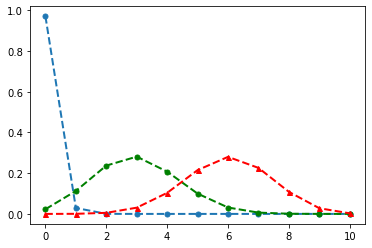

In [145]:
x = np.arange(11)
plt.plot(x, rv1.pmf(x), marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv2.pmf(x), color = 'green', marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv3.pmf(x), color = 'red', marker='^', linestyle='dashed', 
         linewidth=2, markersize=5)

## Binomial Distribution

Number of successes in a sequence of n Bernoulli trials, p = P (success)

In [149]:
from scipy.stats import binom

In [154]:
y1 = binom(40, 0.1)
y2 = binom(40, 0.5)
y3 = binom(40, 0.7)
y4 = binom(40, 0.9)

In [155]:
x = np.arange(41)

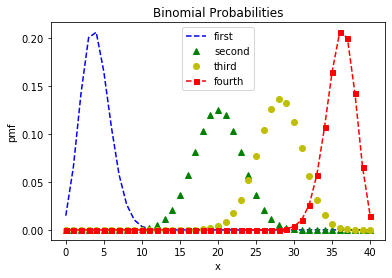

In [166]:
plt.plot(x, y1.pmf(x), '--b')
plt.plot(x, y2.pmf(x), '^g')
plt.plot(x, y3.pmf(x), 'oy')
plt.plot(x, y4.pmf(x), 'sr', markersize=5, linestyle = 'dashed')
plt.ylabel('pmf')
plt.xlabel('x')
plt.title('Binomial Probabilities')
plt.legend( ['first', 'second', 'third', 'fourth'])

In [168]:
hypergeom(20, 3, 3).pmf(3)

0.0008771929824561416

In [173]:
#n is the number of trials
#p is the probability of success in each trial
#m3 is skewness (1st column)
#m4 is kurtosis (2nd column)

def m34binomial(n, p):
    q = 1-p
    den = n*q*p
    m3 = (q-p)/np.sqrt(den)
    m4 = 3 + (1-6*p*q)/den
    return (m3, m4)

def m34negbinomial(r, p):
    q = 1-p
    qr = q*r
    m3 = (1+q)/np.sqrt(qr)
    m4 = 3 + 6/r + p**2/qr
    return (m3, m4)

In [172]:
m34binomial(10000,0.1), 

(0.02666666666666667, 3.000511111111111)

In [181]:
m34negbinomial(np.array([50, 20, 40, 30]), p = 0.1)

(array([0.28323528, 0.44783429, 0.31666667, 0.36565517]),
 array([3.12022222, 3.30055556, 3.15027778, 3.20037037]))

In [249]:
random.seed(2)

In [259]:
n = 10**6
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
W = np.sum(x**2 + y**2 <1)
est = W/250000
est

3.141504

In [267]:
error = abs(est - np.pi)
print(f"Approximation error is: {error}")

Approximation error is: 8.865358979326388e-05


In [283]:
def rW(size, n = 10**6):
    W = np.zeros((1, size))
    for i in range(size):
        x = np.random.uniform(0, 1, n)
        y = np.random.uniform(0, 1, n)
        W[0][i]= np.sum(x**2 + y**2 <1)
    return W

In [284]:
W = rW(50)

In [285]:
est = np.mean(W)/250000
error = abs(est - np.pi)
print(f"Refined approximation error is: {error}")
est

Refined approximation error is: 7.729358979302603e-05


3.14151536

In [278]:
w[0][1]

0.0